# DanBoost



In [59]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk
import sklearn.linear_model as skl
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
#sns.set_context('paper')
#plt.style.use('seaborn')
%matplotlib inline
np.random.seed(42)

<p>The first step is to generate two sets of data. The premise of this exercise is to mimic a real-world situation where the relationship between input and output is affected by noise. To do this, we will add Gaussian noise to a sample of 10 data points from the function y = sin(2πx). To visualize the effect of the noise on the data points, we also generate 100 data points for the continuous function y = sin(2πx)</p>

In [60]:
#Generate datapoints for y = sin (2πx) + noise
fn = lambda x : np.sin(2*math.pi*x)

X = np.random.random_sample(10)
y_orig = fn(X)
noise = np.random.normal(0,0.3,10)
y = y_orig + noise

#Generate Curve for y = sin (2πx)
Xbig = np.linspace(0,1,100)
ybig = fn(Xbig)

Below is the visualization of the original function (orange) along with the noisy datapoints (blue).

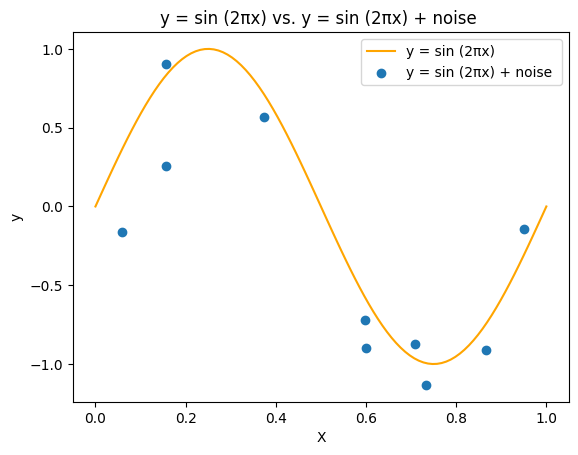

In [61]:
plt.plot(Xbig,ybig, label = 'y = sin (2πx)', color='orange')
plt.scatter(X, y, label = 'y = sin (2πx) + noise ')
plt.legend()
plt.xlabel("X")
plt.ylabel('y')
plt.title('y = sin (2πx) vs. y = sin (2πx) + noise ')
plt.show()

Define a function, DanBoost, that takes a base model and boosts it by fitting the next model to the previous model's residuals.

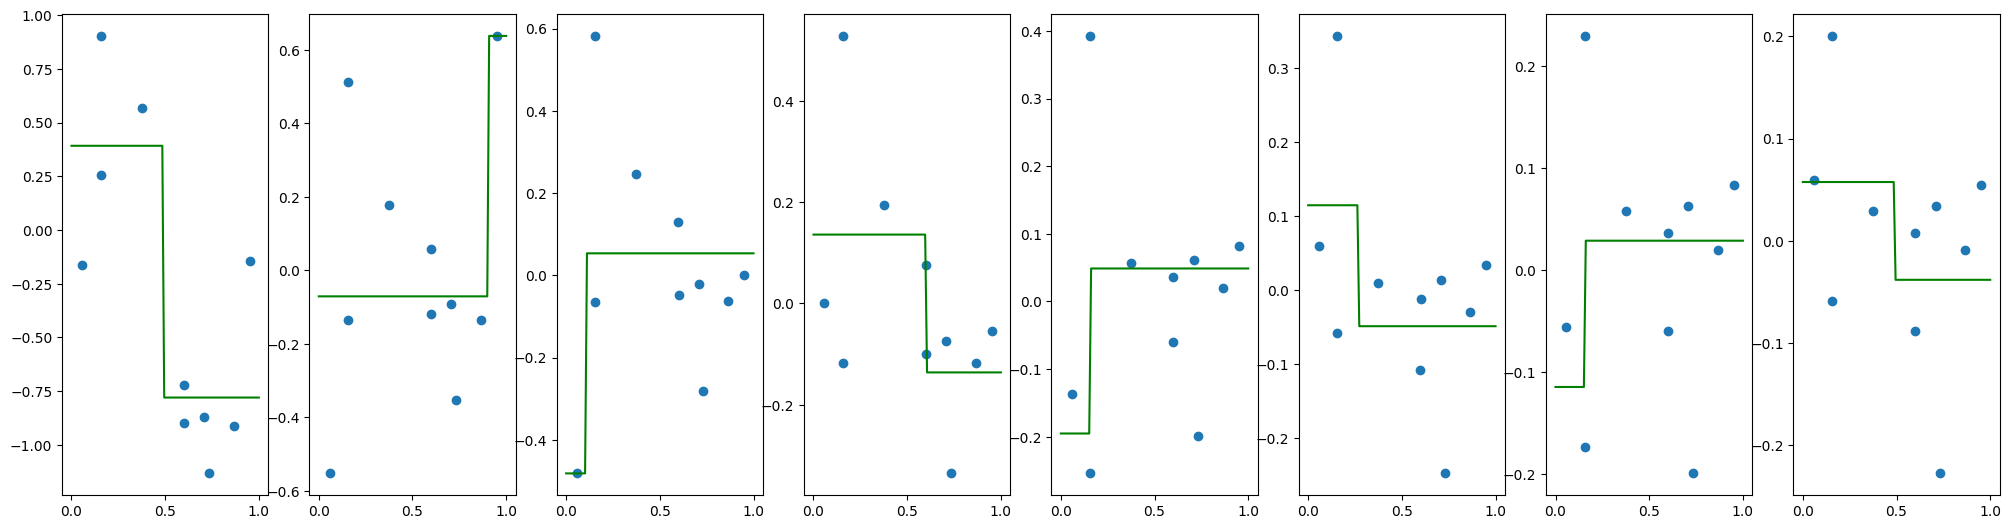

In [62]:
def DanBoost(model,iterations,X,y0,rate=1):
    fig, axs = plt.subplots(1, iterations, figsize = (25,6.25))
    boosted_models = []
    targets = []
    targets.append(y0)
    for i in range(0,iterations):
        # Fit a model to current targets, save for later
        boosted_models.append(sk.clone(model).fit(X,targets[i]))
        # Create next targets
        targets.append(rate*(targets[i] - boosted_models[i].predict(X)))
        # Plot this iteration's targets and predictions
        model_output = boosted_models[i].predict(Xbig.reshape(-1,1))
        axs[i].scatter(X[:,0],targets[i])
        axs[i].plot(Xbig, model_output, color='g')

    return boosted_models

#model = LinearRegression()
model = DecisionTreeRegressor(max_depth=1)

num_models = 8
models = DanBoost(model,num_models,X.reshape(-1,1),y,rate=1)

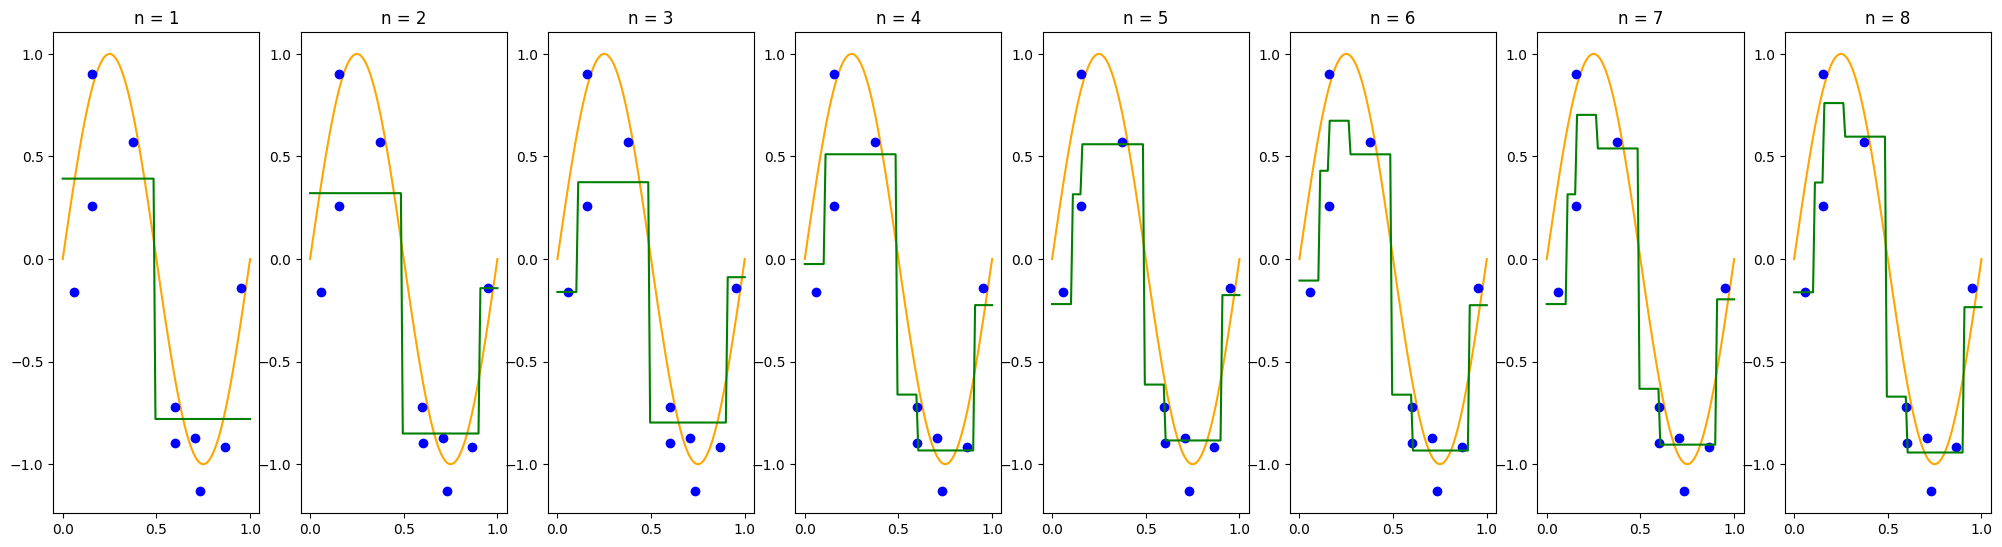

In [63]:
fig, axs = plt.subplots(1,num_models, figsize = (25,6.25))
model_output = np.zeros_like(ybig)
for j in range (0,num_models):
        model_output += models[j].predict(Xbig.reshape(-1,1)) # Predictions to plot
        axs[j].plot(Xbig,ybig, label = 'y = sin (2πx)', color='orange') ## the sin function
        axs[j].plot(X, y,"o", color='b') # the 10 training points (with noise)
        axs[j].plot(Xbig, model_output, color='g')  ## visualization of the model
        axs[j].title.set_text("n = " + str(j+1))